# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [23]:
!pip install tensorflow.keras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 73s 82ms/step - accuracy: 0.7536 - loss: 0.7400 - val_accuracy: 0.9802 - val_loss: 0.0639
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.9542 - loss: 0.1486 - val_accuracy: 0.9890 - val_loss: 0.0376
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 73s 86ms/step - accuracy: 0.9705 - loss: 0.0956 - val_accuracy: 0.9883 - val_loss: 0.0376
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 68s 81ms/step - accuracy: 0.9732 - loss: 0.0887 - val_accuracy: 0.9903 - val_loss: 0.0343
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.9770 - loss: 0.0719 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9796 - loss: 0.0640 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 80ms/step - accuracy: 0.9829 - loss: 0.0560 - val_accuracy: 0.9923 - val_loss: 0.0275
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 68s 80ms/step - accuracy: 0.9832 - loss: 0.0525 - val_accurac

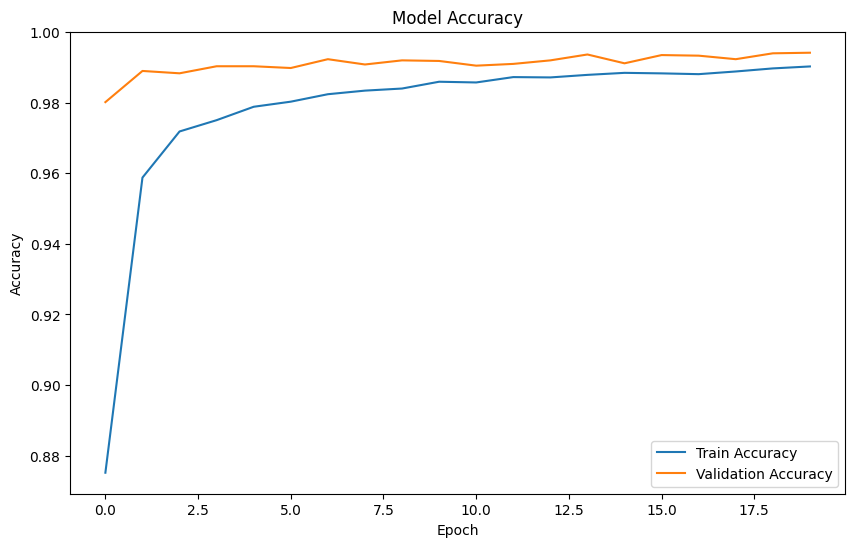

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add channel dimension to the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

# Data augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)

# Create a CNN model with hyperparameter tuning and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(val_images, val_labels)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()